In [23]:
# > /dev/null = suppresses all the output from !pip install fredapi
!pip install fredapi 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
#pd.set_option('max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

fred_api_key = '4deb86f0e314d13992fd8dabd44040d9'



## __Create The Fred Object__

In [25]:
# Create Fred object. After typing Fred() shift + tab will show you document. Provie API key here.
fred = Fred(api_key=fred_api_key)

In [26]:
fred

## __Search Fred For Econ Data__

In [27]:
# Search of 'S&P', ordered_by='popularity'. 
#Shift + Tab will give addtional options = fred.search(text, limit=1000, order_by=None, sort_order=None, filter=None)
sp_search = fred.search('S&P', order_by='popularity' )

In [28]:
# Search limit on Fred to 1000 rows. Can be changed.
sp_search.shape


(1000, 15)

In [29]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2022-11-19,2022-11-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2022-11-17,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-18 08:10:07-06:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2022-11-19,2022-11-19,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:01-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2022-11-19,2022-11-19,ICE BofA US High Yield Index Effective Yield,1996-12-31,2022-11-17,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2022-11-18 08:10:11-06:00,85,This data represents the effective yield of th...
SP500,SP500,2022-11-19,2022-11-19,S&P 500,2012-11-19,2022-11-18,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2022-11-18 19:13:31-06:00,84,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2022-11-19,2022-11-19,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCT1502KS,GCT1502KS,2022-11-19,2022-11-19,Bachelor's Degree or Higher for Kansas,2006-01-01,2021-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-09-15 11:00:13-05:00,3,Estimate of educational attainment for populat...
CGDPOSJOA666NRUG,CGDPOSJOA666NRUG,2022-11-19,2022-11-19,Output-side Real GDP at Current Purchasing Pow...,1954-01-01,2019-01-01,Annual,A,Millions of 2017 U.S. Dollars,Mil. of 2017 U.S. $,Not Seasonally Adjusted,NSA,2021-11-08 13:36:16-06:00,3,Source ID: cgdpo When using these data in you...
LXXRLTNSA,LXXRLTNSA,2022-11-19,2022-11-19,"Home Price Index (Low Tier) for Los Angeles, C...",1987-01-01,2022-08-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2022-10-25 08:02:41-05:00,3,"For more information regarding the index, plea..."


##  __Pull Raw Data__

<AxesSubplot:title={'center':'S&P 500'}>

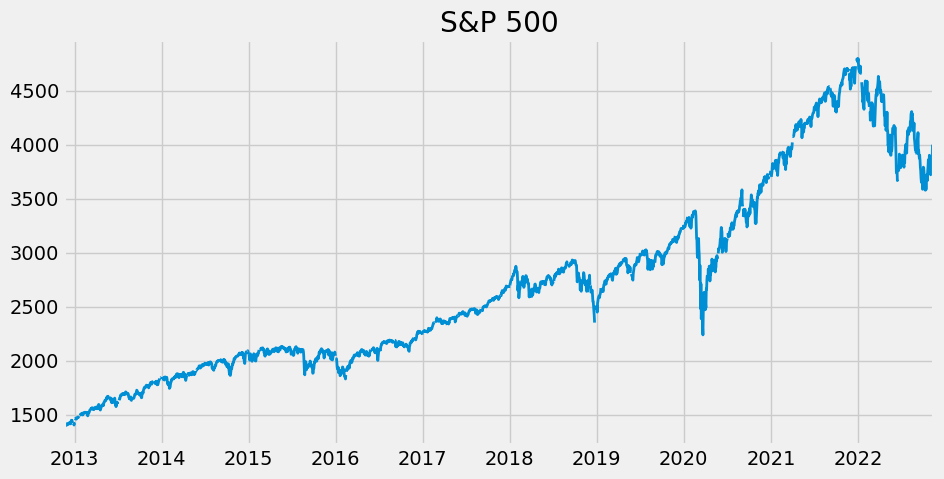

In [30]:
sp500 = fred.get_series(series_id = 'SP500')
# in .plot(): inside (), 1. adjust figsize(x, y), 2. add title, 3. lw = line width
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

## __Pull and Join Multiple Data Series__

In [31]:
unemp_results = fred.search('unemployment')

In [32]:
unrate = fred.get_series('UNRATE')

<AxesSubplot:title={'center':'Unemployment'}>

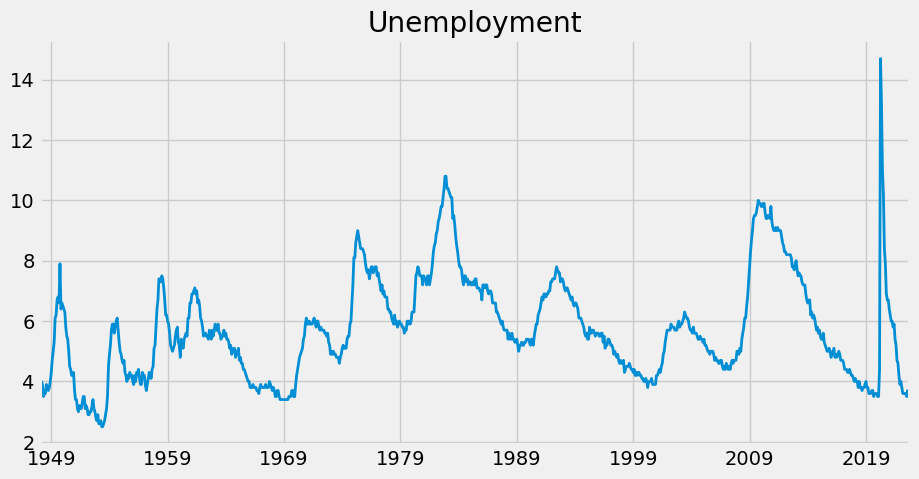

In [33]:
unrate.plot(figsize=(10,5), title='Unemployment', lw=2)

In [34]:
# search (inexact lookup) unemployment rate by state then filter so only rows with frequency = monthly are displayed 
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
# query(exact lookup) for seasonal_adjustment column only "Seasonally Adjusted and column - units only rows with "Percent"
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
# locate under column - title and only titles containing 'Unemployment Rate'
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')].shape

(98, 15)

In [35]:
unemp_df.index

Index(['UNRATE', 'LNS14000006', 'U6RATE', 'CAUR', 'M0892AUSM156SNBR',
       'M0892BUSM156SNBR', 'LNS14000031', 'LNS14000024', 'LNS14000002', 'TXUR',
       ...
       'LBSSA30', 'LBSSA56', 'LBSSA11', 'LBSSA10', 'LBSSA46', 'LNS14000049',
       'LNS13026511', 'LNS14000062', 'LBSSA38', 'LNS14000015'],
      dtype='object', name='series id', length=163)

In [36]:
# Now go through contracted IDs and pull the data series down. Loop through the run get_series

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

In [40]:
all_results[9]

,TXUR
1976-01-01,5.8
1976-02-01,5.8
1976-03-01,5.9
1976-04-01,5.9
1976-05-01,5.9
...,...
2022-06-01,4.1
2022-07-01,4.0
2022-08-01,4.1
2022-09-01,4.0


In [72]:
# Concatonate the strings of indices stored in list(all_results). axis=1 so they're stacked side by side
pd.concat(all_results, axis=1).drop('M0892BUSM156SNBR', axis=1)


,UNRATE,LNS14000006,U6RATE,CAUR,M0892AUSM156SNBR,LNS14000031,LNS14000024,LNS14000002,TXUR,FLUR,...,LBSSA30,LBSSA56,LBSSA11,LBSSA10,LBSSA46,LNS14000049,LNS13026511,LNS14000062,LBSSA38,LNS14000015
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01,3.6,5.8,6.7,4.2,NaN,5.3,3.3,3.6,4.1,2.8,...,62.6,63.5,72.9,61.2,68.9,2.9,30.7,3.2,69.3,10.4
2022-07-01,3.5,6.0,6.7,3.9,NaN,5.7,3.1,3.4,4.0,2.7,...,62.6,63.4,73.0,61.1,68.9,2.8,30.9,2.9,69.1,10.1
2022-08-01,3.7,6.4,7.0,4.1,NaN,6.0,3.4,3.5,4.1,2.7,...,62.7,63.2,73.0,61.0,68.9,3.0,32.9,3.1,69.0,9.4
2022-09-01,3.5,5.8,6.7,3.8,NaN,5.8,3.2,3.4,4.0,2.5,...,62.6,63.1,72.7,60.8,68.7,2.8,30.5,2.9,68.8,10.8


In [62]:
fred.search('DSUR')

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
DSUR,Monthly,M,DSUR,2009-03-12 15:01:09-05:00,This series is calculated by FRB-St. Louis usi...,2008-12-01,1976-01-01,1,2022-11-19,2022-11-19,Seasonally Adjusted,SA,Unemployment Rate in FRB-St. Louis District St...,Percent,%
